In [44]:
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

In [103]:
data_url = 'US_Regional_Sales_Data.csv'
df = pd.read_csv(data_url)
print(df.shape)
df.head()

(7991, 16)


,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Cost,Unit Price
0,SO - 000101,In-Store,WARE-UHY1004,31/12/17,31/5/18,14/6/18,19/6/18,USD,6,15,259,12,5,0.075,"1,001.18","1,963.10"
1,SO - 000102,Online,WARE-NMK1003,31/12/17,31/5/18,22/6/18,2/7/18,USD,14,20,196,27,3,0.075,"3,348.66","3,939.60"
2,SO - 000103,Distributor,WARE-UHY1004,31/12/17,31/5/18,21/6/18,1/7/18,USD,21,16,213,16,1,0.050,781.22,"1,775.50"
3,SO - 000104,Wholesale,WARE-NMK1003,31/12/17,31/5/18,2/6/18,7/6/18,USD,28,48,107,23,8,0.075,"1,464.69","2,324.90"
4,SO - 000105,Distributor,WARE-NMK1003,10/4/18,31/5/18,16/6/18,26/6/18,USD,22,49,111,26,8,0.100,"1,476.14","1,822.40"


In [104]:
#Eliminamos la columna de id
df = df.drop(['OrderNumber','ProcuredDate','OrderDate','ShipDate','DeliveryDate'], axis=1)

#Convertimos el campo de date, en una variable de fecha para poder separar por años
#df.drop[['ProcuredDate','OrderDate','ShipDate','DeliveryDate']]
#df['ProcuredDate'] = pd.to_datetime(df['ProcuredDate'])
#df['OrderDate'] = pd.to_datetime(df['OrderDate'])
#df['ShipDate'] = pd.to_datetime(df['ShipDate'])
#df['DeliveryDate'] = pd.to_datetime(df['DeliveryDate'])
df['Unit Cost'] = df['Unit Cost'].str.replace(',','').astype(float)
df['Unit Price'] = df['Unit Price'].str.replace(',','').astype(float)
df['Sales Channel'] = df['Sales Channel'].astype('category').cat.codes
df['WarehouseCode'] = df['WarehouseCode'].astype('category').cat.codes
df['CurrencyCode'] = df['CurrencyCode'].astype('category').cat.codes
df.head()




,Sales Channel,WarehouseCode,CurrencyCode,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Cost,Unit Price
0,1,4,0,6,15,259,12,5,0.075,1001.18,1963.1
1,2,2,0,14,20,196,27,3,0.075,3348.66,3939.6
2,0,4,0,21,16,213,16,1,0.050,781.22,1775.5
3,3,2,0,28,48,107,23,8,0.075,1464.69,2324.9
4,0,2,0,22,49,111,26,8,0.100,1476.14,1822.4


In [105]:
df.describe()

,Sales Channel,WarehouseCode,CurrencyCode,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Cost,Unit Price
count,7991.000000,7991.000000,7991.0,7991.000000,7991.000000,7991.000000,7991.000000,7991.000000,7991.000000,7991.000000,7991.000000
mean,1.354899,2.655988,0.0,14.384307,25.457014,183.850081,23.771743,4.525341,0.114394,1431.911513,2284.536504
std,0.892572,1.508811,0.0,7.986086,14.414883,105.903946,13.526545,2.312631,0.085570,1112.413063,1673.096364
min,0.000000,0.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.050000,68.680000,167.500000
25%,1.000000,2.000000,0.0,8.000000,13.000000,91.000000,12.000000,3.000000,0.050000,606.120000,1031.800000
50%,1.000000,2.000000,0.0,14.000000,25.000000,183.000000,24.000000,5.000000,0.075000,1080.580000,1849.200000
75%,2.000000,4.000000,0.0,21.000000,38.000000,276.000000,36.000000,7.000000,0.150000,2040.250000,3611.300000
max,3.000000,5.000000,0.0,28.000000,50.000000,367.000000,47.000000,8.000000,0.400000,5498.560000,6566.000000


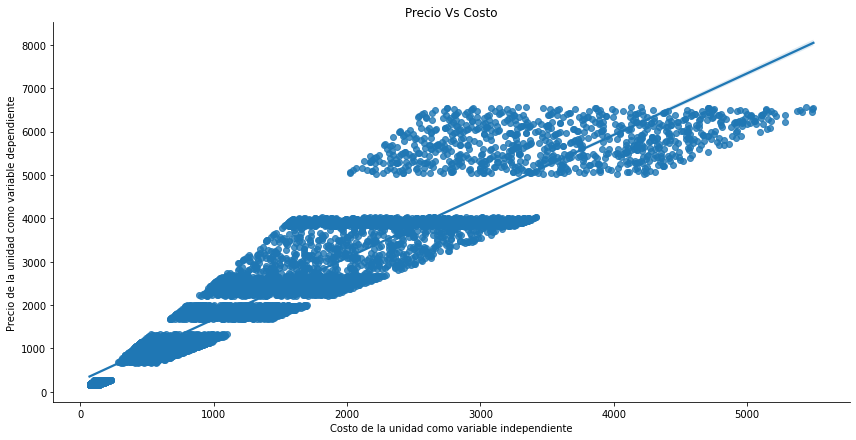

In [106]:
sns.lmplot(x='Unit Cost',y='Unit Price',data=df,aspect=2,height=6)
plt.xlabel('Costo de la unidad como variable independiente')
plt.ylabel('Precio de la unidad como variable dependiente')
plt.title('Precio Vs Costo');

                  Sales Channel  WarehouseCode  CurrencyCode  _SalesTeamID  \
Sales Channel          1.000000       0.013068           NaN      0.260862   
WarehouseCode          0.013068       1.000000           NaN      0.018161   
CurrencyCode                NaN            NaN           NaN           NaN   
_SalesTeamID           0.260862       0.018161           NaN      1.000000   
_CustomerID            0.005096      -0.004918           NaN     -0.006335   
_StoreID              -0.017248      -0.383358           NaN     -0.014791   
_ProductID            -0.011824       0.008901           NaN      0.001269   
Order Quantity        -0.001447       0.011412           NaN      0.009241   
Discount Applied       0.007952       0.017638           NaN     -0.004332   
Unit Cost             -0.007525       0.010342           NaN      0.004416   
Unit Price            -0.007707       0.004571           NaN      0.007223   

                  _CustomerID  _StoreID  _ProductID  Order Quan

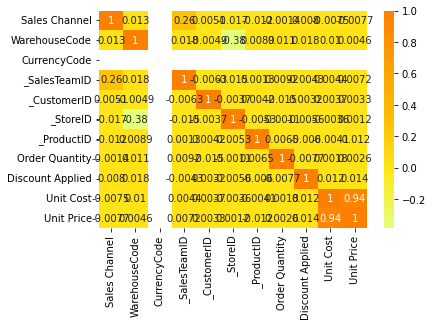

In [107]:
corr = df.corr()
print(corr)
sns.heatmap(corr, cmap = 'Wistia', annot= True);

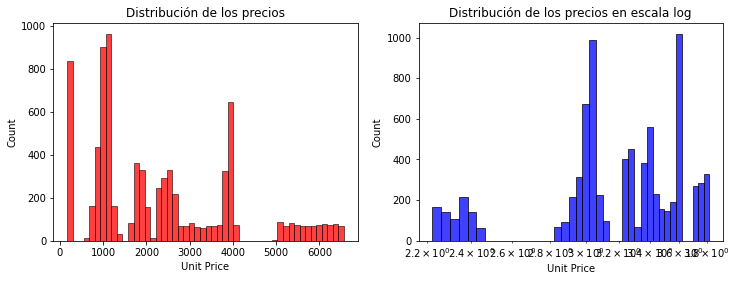

In [108]:
f= plt.figure(figsize=(12,4))

ax=f.add_subplot(121)
sns.histplot(df['Unit Price'],bins=50,color='r',ax=ax)
ax.set_title('Distribución de los precios')

ax=f.add_subplot(122)
sns.histplot(np.log10(df['Unit Price']),bins=40,color='b',ax=ax)
ax.set_title('Distribución de los precios en escala log')
ax.set_xscale('log')

Text(0.5, 1.0, 'Gráfico de violín de precios vs habitaciones')

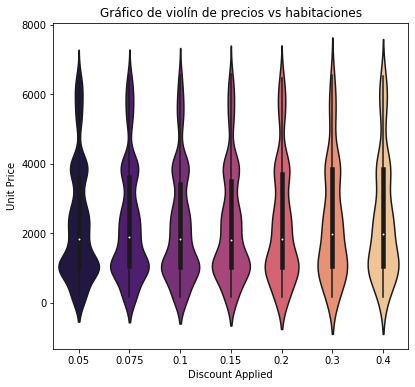

In [109]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.violinplot(x='Discount Applied', y='Unit Price',data=df,palette='magma',ax=ax)
ax.set_title('Gráfico de violín de precios vs habitaciones')



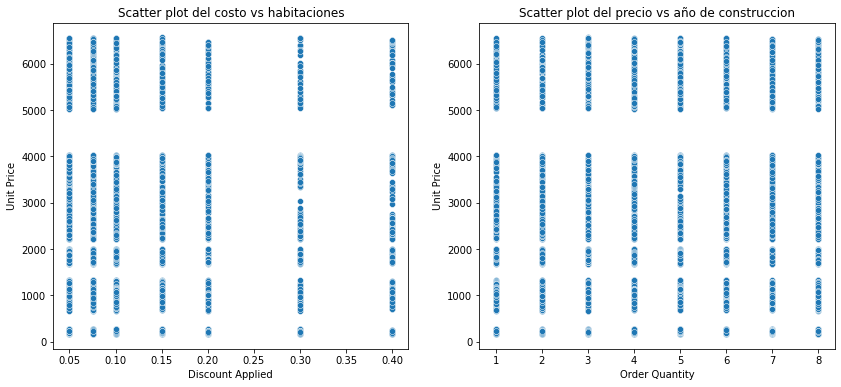

In [110]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.scatterplot(x='Discount Applied',y='Unit Price',data=df,ax=ax)
ax.set_title('Scatter plot del costo vs habitaciones')

ax = f.add_subplot(122)
sns.scatterplot(x='Order Quantity',y='Unit Price',data=df)
ax.set_title('Scatter plot del precio vs año de construccion')
plt.savefig('sc.png');



Iniciamos con el entrenamiento de un modelo de regresión lineal utilizando la libreria sklearn

In [111]:
from sklearn.model_selection import train_test_split

X = df.drop('Unit Price',axis=1) # Independet variable
y = df['Unit Price'] # dependent variable

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=23)

In [112]:
print(y_train.shape, X_train.shape)
print(y_test.shape, X_test.shape)

(5993,) (5993, 10)
(1998,) (1998, 10)


In [113]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train['Unit Cost'].array.reshape(-1, 1),  y_train)
print(lin_reg.intercept_, lin_reg.coef_)


260.6840419499158 [1.41275138]


Podemos apreciar los valores de la intercepción y del coeficiente. Para medir  el rendimineto del modelo vamos a predecir el precio de las viviendas del 2015.

In [114]:
y_pred_sk = lin_reg.predict(X_test['Unit Cost'].array.reshape(-1, 1))

from sklearn.metrics import mean_squared_error

J_mse_sk = mean_squared_error(y_pred_sk, y_test)

# R_square
R_square_sk = lin_reg.score(X_test['Unit Cost'].array.reshape(-1, 1),y_test)

print('El valor de MSE es: ',J_mse_sk)
print('El R^2 obtenido por scikit learn es :',R_square_sk)

El valor de MSE es:  312220.4674927496
El R^2 obtenido por scikit learn es : 0.8900967202380548


Text(0.5, 1.0, 'Verificar normalidad en los residuos')

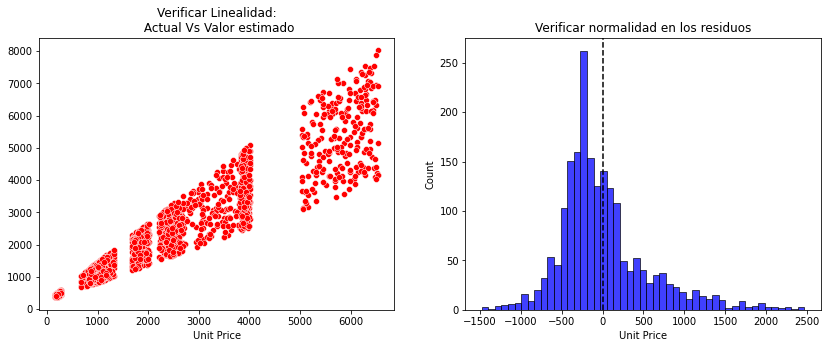

In [115]:
# Check for Linearity
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(x=y_test, y=y_pred_sk,ax=ax,color='r')
ax.set_title('Verificar Linealidad:\n Actual Vs Valor estimado')

# Check for Residual normality & mean
ax = f.add_subplot(122)
sns.histplot((y_test - y_pred_sk),ax=ax,color='b')
ax.axvline((y_test - y_pred_sk).mean(),color='k',linestyle='--')
ax.set_title('Verificar normalidad en los residuos')

Podemos repetir el modelo de regression considerando variables adicionales. En nuestro caso vamos a incorporar el año de construcción y la cantidad de habitaciones.

In [116]:
lin_reg_mult = LinearRegression()
lin_reg_mult.fit(X_test,  y_test)
print(lin_reg_mult.intercept_, lin_reg_mult.coef_)

285.5483287903446 [-1.13244387e+01 -1.92078817e+00  2.48689958e-14  1.60802901e+00
  4.00162670e-01  5.92672644e-03 -8.11960834e-01 -7.73395267e+00
 -3.83167081e+01  1.42908853e+00]


In [118]:
y_pred_ml = lin_reg_mult.predict(X_test)

J_mse_sk = mean_squared_error(y_pred_ml, y_test)

# R_square
R_square_ml = lin_reg_mult.score(X_test,y_test)

print('El valor de MSE es: ',J_mse_sk)
print('El R^2 obtenido por scikit learn es :',R_square_ml)

El valor de MSE es:  311134.70397977513
El R^2 obtenido por scikit learn es : 0.8904789148202357
